<a href="https://colab.research.google.com/github/jieun1102/dprproject/blob/main/dprproject_0530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'dprproject'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (469/469), done.
remote: Compressing objects: 100% (463/463), done.
remote: Total 469 (delta 70), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (469/469), 162.19 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (70/70), done.
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



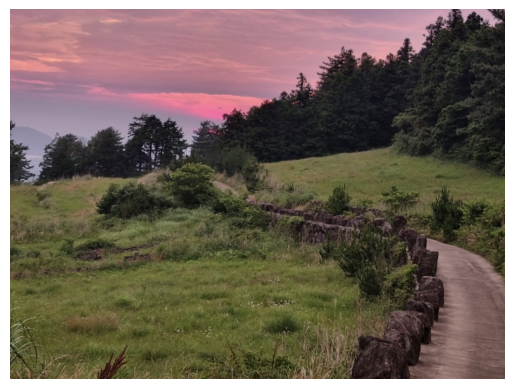

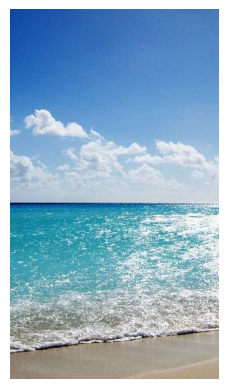

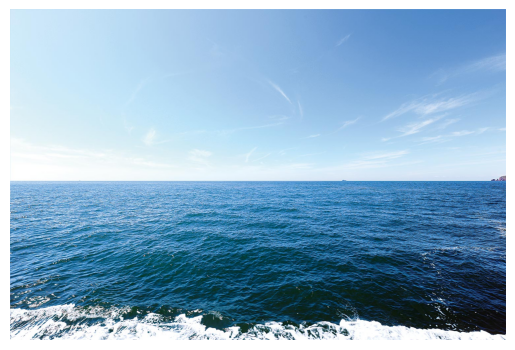

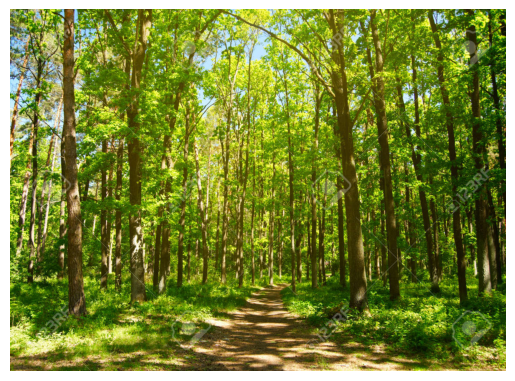

Epoch 1/10
6/6 [==============================] - 6s 825ms/step - loss: 1.4012 - accuracy: 0.5676 - val_loss: 0.3613 - val_accuracy: 0.8085
Epoch 2/10
6/6 [==============================] - 5s 909ms/step - loss: 0.2066 - accuracy: 0.9189 - val_loss: 0.1070 - val_accuracy: 0.9574
Epoch 3/10
6/6 [==============================] - 5s 859ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.0614 - val_accuracy: 0.9787
Epoch 4/10
6/6 [==============================] - 4s 729ms/step - loss: 0.0630 - accuracy: 0.9676 - val_loss: 0.0951 - val_accuracy: 0.9574
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.0465 - accuracy: 0.9892 - val_loss: 0.1101 - val_accuracy: 0.9574
Epoch 6/10
6/6 [==============================] - 5s 753ms/step - loss: 0.0462 - accuracy: 0.9838 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 4s 744ms/step - loss: 0.0707 - accuracy: 0.9784 - val_loss: 0.1630 - val_accuracy: 0.9574
Epoch 8/10
6/6 [=======

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image

# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git
data_dir = './dprproject/data/'
test_dir = './dprproject/data/test/'

# 이미지와 레이블 불러오기
def load_data(data_dir):
    categories = ['sea', 'forest']
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (128, 128))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)

images, labels = load_data(data_dir)
labels = to_categorical(labels, num_classes=2)

# 이미지 데이터 정규화
images = images / 255.0

# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# forest 폴더 안에 있는 이미지 중 하나를 화면에 출력
image_path = os.path.join(data_dir, 'forest')
filename = os.listdir(image_path)[0]
image_file = os.path.join(image_path, filename)
image = cv2.imread(image_file)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# test 폴더 안에 있는 이미지 중 하나를 화면에 출력
test_image_path = test_dir  # test 이미지 폴더 경로

# 테스트 이미지 폴더 안에 있는 모든 이미지 파일 출력
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_file = os.path.join(test_dir, filename)  # 이미지 파일 경로 생성
        image = cv2.imread(image_file)  # 이미지 파일 읽기
        if image is not None:  # 이미지가 제대로 읽혔는지 확인
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 이미지 출력
            plt.axis('off')  # 축 제거
            plt.show()

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 테스트 이미지 불러오기 및 전처리
test_images = []
test_image_paths = []  # 테스트 이미지 파일 경로를 저장할 리스트
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.resize((128, 128))  # 모델의 입력 크기와 일치하도록 크기 조정
        img_array = np.array(img) / 255.0  # 이미지 데이터를 정규화
        test_images.append(img_array)
        test_image_paths.append(os.path.join(test_dir, filename))  # 파일 경로 저장

# 테스트 이미지 파일 목록 출력
print("테스트 이미지 파일 목록:")
for path in test_image_paths:
    print(path)

# 예측 수행 및 결과 출력
for i, img_array in enumerate(test_images):
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    prediction = model.predict(img_array)
    if prediction[0][0] > prediction[0][1]:
        print(f"이미지 {i+1}: 해당 이미지는 바다입니다.")
    else:
        print(f"이미지 {i+1}: 해당 이미지는 숲입니다.")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git
data_dir = './dprproject/data/'
test_dir = './dprproject/data/test/'

# 이미지와 레이블 불러오기
def load_data(data_dir):
    categories = ['sea', 'forest']
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (128, 128))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)

images, labels = load_data(data_dir)
labels = to_categorical(labels, num_classes=2)

# 이미지 데이터 정규화
images = images / 255.0

# 데이터 증강을 위한 ImageDataGenerator 생성
datagen = ImageDataGenerator(
    rotation_range=20,  # 랜덤하게 이미지를 최대 20도 회전
    width_shift_range=0.1,  # 랜덤하게 이미지를 가로로 최대 10% 이동
    height_shift_range=0.1,  # 랜덤하게 이미지를 세로로 최대 10% 이동
    horizontal_flip=True,  # 랜덤하게 이미지를 수평으로 뒤집기
    vertical_flip=False,  # 수직 뒤집기는 사용하지 않음
    zoom_range=0.1  # 랜덤하게 이미지를 최대 10% 확대/축소
)

# 학습 및 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 증강 적용하여 모델 학습
datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=10, validation_data=(x_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 테스트 이미지 예측 및 결과 출력
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        if prediction[0][0] > prediction[0][1]:
            print(f"이미지 {filename}: 해당 이미지는 바다입니다.")
        else:
            print(f"이미지 {filename}: 해당 이미지는 숲입니다.")


Cloning into 'dprproject'...
remote: Enumerating objects: 472, done.
remote: Counting objects: 100% (472/472), done.
remote: Compressing objects: 100% (466/466), done.
remote: Total 472 (delta 71), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (472/472), 163.36 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (71/71), done.
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Epoch 1/10
7/7 [==============================] - 9s 985ms/step - loss: 1.6020 - accuracy: 0.6293 - val_loss: 0.2766 - val_accuracy: 0.8621
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.1482 - accuracy: 0.9569 - val_loss: 0.2115 - val_accuracy: 0.8793
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0066 - val_accura

fatal: destination path 'dprproject' already exists and is not an empty directory.
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Epoch 1/10
7/7 [==============================] - 12s 1s/step - loss: 1.6871 - accuracy: 0.5259 - val_loss: 0.5187 - val_accuracy: 0.5345
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.3594 - accuracy: 0.8578 - val_loss: 0.1942 - val_accuracy: 0.9828
Epoch 3/10
7/7 [==============================] - 7s 931ms/step - loss: 0.1491 - accuracy: 0.9741 - val_loss: 0.0324 - val_accuracy: 0.9828
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.1047 - accuracy: 0.9741 - val_loss: 0.2146 - val_accuracy: 0.9138
Epoch 5/10
7/7 [==============================] - 7s 923ms/step - loss: 0.1655 - accuracy: 0.9440 - val_l

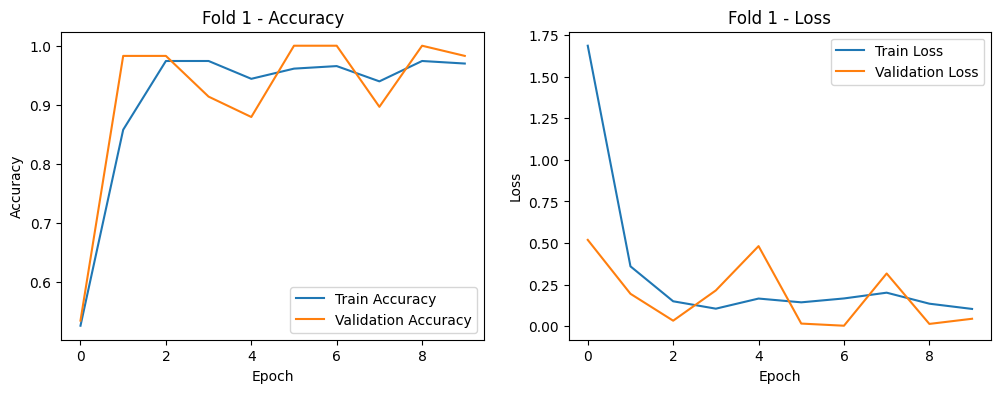

Epoch 1/10
7/7 [==============================] - 8s 978ms/step - loss: 0.7101 - accuracy: 0.7457 - val_loss: 0.4658 - val_accuracy: 0.7931
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.1175 - accuracy: 0.9526 - val_loss: 0.2209 - val_accuracy: 0.9310
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.0932 - accuracy: 0.9698 - val_loss: 0.5636 - val_accuracy: 0.8966
Epoch 4/10
7/7 [==============================] - 7s 871ms/step - loss: 0.0756 - accuracy: 0.9698 - val_loss: 0.1079 - val_accuracy: 0.9655
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.0775 - accuracy: 0.9698 - val_loss: 0.2714 - val_accuracy: 0.9655
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.0504 - accuracy: 0.9828 - val_loss: 0.1614 - val_accuracy: 0.9828
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.0708 - accuracy: 0.9784 - val_loss: 0.1575 - val_accuracy: 0.9828
Epoch 8/10
7/7 [===================

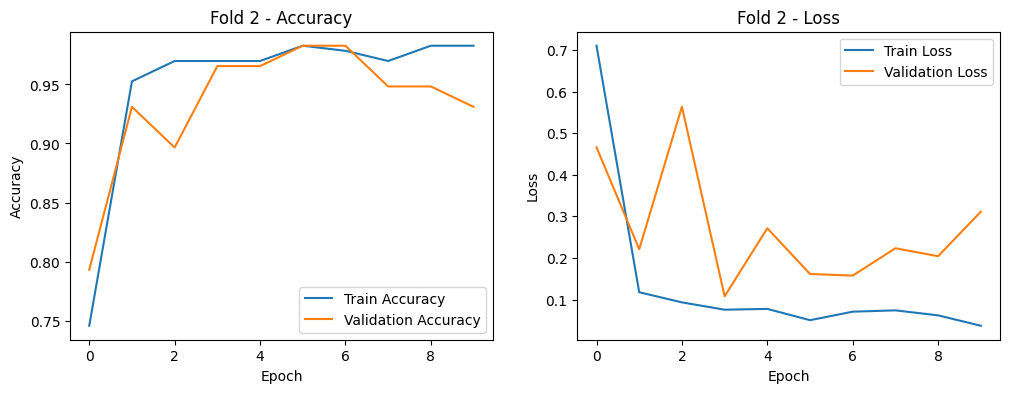

Epoch 1/10
7/7 [==============================] - 12s 1s/step - loss: 3.7956 - accuracy: 0.5345 - val_loss: 0.6108 - val_accuracy: 0.9138
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.5693 - accuracy: 0.7241 - val_loss: 0.3651 - val_accuracy: 0.8448
Epoch 3/10
7/7 [==============================] - 7s 908ms/step - loss: 0.1924 - accuracy: 0.9569 - val_loss: 0.2306 - val_accuracy: 0.8966
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.1280 - accuracy: 0.9741 - val_loss: 0.2909 - val_accuracy: 0.8966
Epoch 5/10
7/7 [==============================] - 7s 935ms/step - loss: 0.0778 - accuracy: 0.9698 - val_loss: 0.2648 - val_accuracy: 0.9138
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.0520 - accuracy: 0.9828 - val_loss: 0.1218 - val_accuracy: 0.9310
Epoch 7/10
7/7 [==============================] - 7s 901ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.1431 - val_accuracy: 0.9310
Epoch 8/10
7/7 [===============

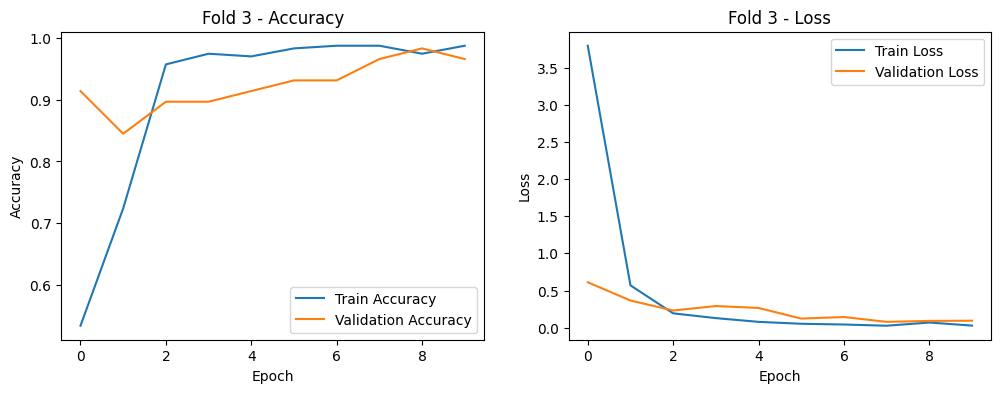

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.8109 - accuracy: 0.6853 - val_loss: 0.7588 - val_accuracy: 0.7241
Epoch 2/10
7/7 [==============================] - 7s 928ms/step - loss: 0.2444 - accuracy: 0.9052 - val_loss: 0.1211 - val_accuracy: 0.9483
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.1122 - accuracy: 0.9526 - val_loss: 0.1045 - val_accuracy: 0.9483
Epoch 4/10
7/7 [==============================] - 7s 997ms/step - loss: 0.0702 - accuracy: 0.9741 - val_loss: 0.0324 - val_accuracy: 0.9828
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0573 - accuracy: 0.9741 - val_loss: 0.0541 - val_accuracy: 0.9828
Epoch 6/10
7/7 [==============================] - 7s 908ms/step - loss: 0.0274 - accuracy: 0.9957 - val_loss: 0.1120 - val_accuracy: 0.9828
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.0612 - accuracy: 0.9741 - val_loss: 0.2552 - val_accuracy: 0.9483
Epoch 8/10
7/7 [===============

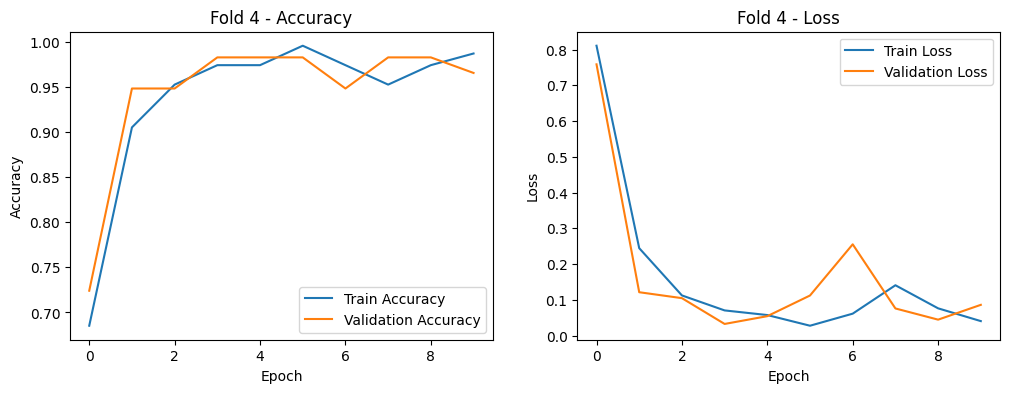

Epoch 1/10
7/7 [==============================] - 8s 941ms/step - loss: 1.2209 - accuracy: 0.5948 - val_loss: 0.4472 - val_accuracy: 0.6724
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.1321 - accuracy: 0.9483 - val_loss: 0.1449 - val_accuracy: 0.9828
Epoch 3/10
7/7 [==============================] - 7s 886ms/step - loss: 0.1187 - accuracy: 0.9612 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 7s 888ms/step - loss: 0.1654 - accuracy: 0.9440 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0829 - accuracy: 0.9655 - val_loss: 0.0438 - val_accuracy: 0.9828
Epoch 6/10
7/7 [==============================] - 7s 898ms/step - loss: 0.0785 - accuracy: 0.9741 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0540 - accuracy: 0.9655 - val_loss: 0.0176 - val_accuracy: 0.9828
Epoch 8/10
7/7 [=============

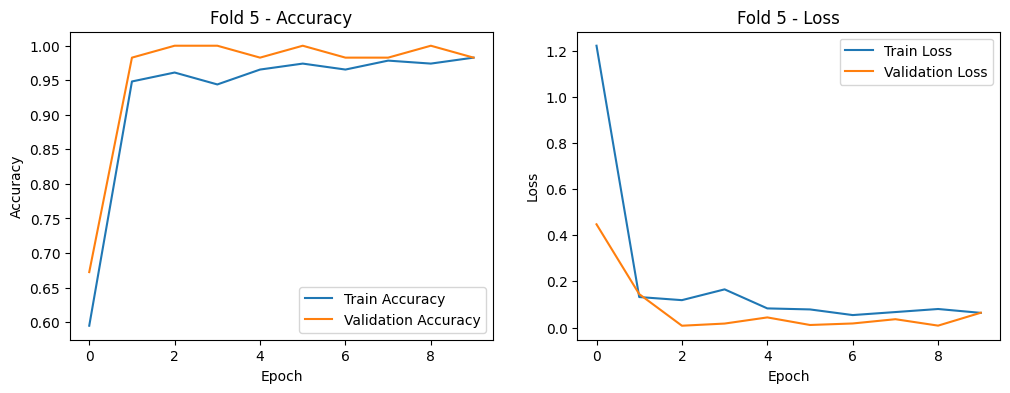

------------------------------------------------------------------------
Score per fold
> Fold 1 - Loss: 0.04391699284315109 - Accuracy: 98.2758641242981%
> Fold 2 - Loss: 0.3110698163509369 - Accuracy: 93.1034505367279%
> Fold 3 - Loss: 0.09327489882707596 - Accuracy: 96.55172228813171%
> Fold 4 - Loss: 0.0858253538608551 - Accuracy: 96.55172228813171%
> Fold 5 - Loss: 0.06415092945098877 - Accuracy: 98.2758641242981%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 96.5517246723175 (+- 1.888698399106614)
> Loss: 0.11964759826660157
------------------------------------------------------------------------
테스트 이미지 파일 목록:
./dprproject/data/test/testimage1.jpg
./dprproject/data/test/testimage2.jpg
./dprproject/data/test/testimage3.jpg
1/1 [==============================] - 0s 125ms/step
이미지 1: 해당 이미지는 숲입니다.
1/1 [==============================] - 0s 44ms/step
이미지 2: 해당 이미지는 숲입니다.
1/1 [==============================] - 0s 44m

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History
from PIL import Image

# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git

#데이터 디렉토리 경로 설정
data_dir = './dprproject/data/'

#테스트 데이터 디렉토리 경로 설정
test_dir = './dprproject/data/test/'

# 데이터 전처리 함수 정의
def load_data(data_dir):
    categories = ['sea', 'forest'] #카테고리 정의
    data = [] #이미지 데이터를 저장할 리스트
    labels = [] #레이블을 저장할 리스트
    for category in categories: #각 카테고리 반복
        path = os.path.join(data_dir, category) #카테고리의 경로 설정
        class_num = categories.index(category) #카테고리 인덱스 레이블 설정
        for img in os.listdir(path): #각 카테고리 내의 이미지 파일 반복
            try:
                img_array = cv2.imread(os.path.join(path, img)) #이미지 파일을 읽고
                resized_img = cv2.resize(img_array, (128, 128)) #일관된 크기로 입력을 주기 위해(+효율성 증대) 이미지 크기를 128x128로 조정
                data.append(resized_img) #크기가 조정된 이미지 데이터를 리스트에 추가
                labels.append(class_num) #이미지에 해당하는 레이블을 리스트에 추가
            except Exception as e: #이미지 파일을 읽을 수 없는 경우 예외 처리
                print(e) #에러 메시지 출력
    return np.array(data), np.array(labels) #효율성과 일관성을 유지하기 위해 이미지 데이터와 레이블을 numpy 배열로 반환

# 데이터 불러오기
# data_dir 은 이미지 데이터가 저장된 디렉토리의 경로이고, 해당 디렉토리에는 sea와 forest 서브 디렉토리가 있음
# load_data(data_dir) 함수 호출을 통해 이미지 데이터와 레이블이 변수 images와 labels에 각각 저장되어 이후 전처리 및 학습에 활용됨

images, labels = load_data(data_dir)

# 레이블을 원-핫 인코딩(다중 클래스 분류에서 모델의 성능을 향상시키는데 도움이 되므로)으로 변환
lb = LabelBinarizer() #클래스 레이블을 고유한 이진 벡터로 매핑하는 데 사용함
labels = lb.fit_transform(labels) #레이블 데이터를 입력으로 받아, 각 클래스 레이블을 이진 벡터로 매핑하고 변환된 이진 벡터로 구성된 배열 반환
labels = to_categorical(labels) #이진 벡터로 변환된 레이블을 원 핫 인코딩 형식으로 반환, 다중 클래스 분류 모델에 적합한 형태로 변환하는 과정

# 이미지 데이터 정규화
# 이미지 데이터를 0과 1 사이의 값으로 정규화하여 모델의 학습을 안정화시킴(0~255)
images = images / 255.0

# 데이터 증강을 위한 ImageDataGenerator 생성
# 과적합을 방지하고, 데이터 부족 문제를 해결 및 일반화된 모델을 생성 위함, 데이터의 다양성을 높여줄 수 있음
# 여러 번 시도해서 최적의 값 찾기
datagen = ImageDataGenerator(
    rotation_range=20,  # 랜덤하게 이미지를 최대 20도 회전
    width_shift_range=0.1,  # 랜덤하게 이미지를 가로로 최대 10% 이동
    height_shift_range=0.1,  # 랜덤하게 이미지를 세로로 최대 10% 이동
    horizontal_flip=True,  # 랜덤하게 이미지를 수평으로 뒤집기
    zoom_range=0.1  # 랜덤하게 이미지를 최대 10% 확대/축소
)

# K-Fold 교차 검증 설정
# 모델의 일반화 성능을 평가하기 위함
# 데이터를 5개의 폴드로 나눔(총 5번의 반복 검증), 모든 폴드에 다른 데이터가 포함되도록 (true), 재현 가능한 결과를 얻기 위해 설정, 동일한 코드 실행시 동일한 분할 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#각 폴드에서의 모델 성능을 확인, 전반적인 성능 평가 가능
acc_per_fold = [] #k-Fold에서 얻은 정확도를 저장하는 리스트
loss_per_fold = [] #k-Fold에서 얻은 손실을 저장하는 리스트

# CNN 모델 정의 함수
# 각 레이어는 sequential 모델 내에 순차적으로 추가되며, 마지막에는 compile 메서드를 사용하여 모델을 컴파일함
# Con2D 레이어를 중첩함으로써 깊은 특징 추출
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), #2차원 컨볼루션 레이어, 출력 필터 : 32개(간단한 특징 추출), 컨볼루션 커널 크기 :(3,3)
        MaxPooling2D(pool_size=(2, 2)), #최대 풀링 레이어,
        Conv2D(64, (3, 3), activation='relu'), #2차원 컨볼루션 레이어, 출력 필터 : 64개(더 깊은 내용 추출), 컨볼루션 커널 크기 :(3,3)
        MaxPooling2D(pool_size=(2, 2)), #Conv2D 레이어의 출력을 입력으로 받아 작은 영역으로 이미지를 나누고, 각 영역에서 최대값을 선택하여 출력(공간적인 차원 절반으로 줄어듦)
        Flatten(), #n차원의 데이터를 1차원으로
        Dense(128, activation='relu'),#위와 동일한 과정 반복하여 공간적인 차원을 줄임
        Dropout(0.5), #과적합 방지위해 dropout 레이어 적용
        Dense(2, activation='softmax') #출력 레이어 정의, 소프트맥스 사용-다중 클래스 분류문제 해결
    ])
    #Adam - 경사하강법(모델의 가중치 업데이트 하는데 사용), 손실 함수로 categorical crossentropy 사용, 모델 성능 평가 사용 지표로 정확도 사용
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold 교차 검증 실행
fold_no = 1
for train_index, val_index in kf.split(images): #train_index : 학습 세트의 인덱스. val_index : 검증 세트의 인덱스 , kf.split(images) : 이미지 데이터를 K개의 폴드로 나누는 인덱스 생성
    x_train, x_val = images[train_index], images[val_index] # x_train : 학습 데이터, x_val : 검증 데이터
    y_train, y_val = labels[train_index], labels[val_index] # y_train : 학습 레이블. y_val : 검증 데이터

    # 모델 생성
    model = create_model()

    # 데이터 증강 적용하여 모델 학습
    history = History() #학습한 내용을 저장할 수 있는 객체 생성
    datagen.fit(x_train) #데이터 증강을 적용할 이미지 데이터에 대해 ImageDataGenerator 적용, 필요한 내부 파라미터를 계산하기 위함
    model.fit(datagen.flow(x_train, y_train, batch_size=32), #model.fit()을 사용하여 모델 학습, datagen.flow(x_train, y_train, batch_size=32)는 데이터 증강이 적용된 이미지와 레이블 배치를 생성하는 제너레이터 반환
              steps_per_epoch=len(x_train) / 32, epochs=10, validation_data=(x_val, y_val), #학습 데이터의 총 샘플 수를 배치 크기로 나눈 값, 총 학습 반복회수(10), 검증 데이터 지정
              callbacks=[history]) #콜백 함수 : 학습 기록을 저장하는 History 객체를 전달


    # 모델 평가
    scores = model.evaluate(x_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # 학습 및 검증 정확도 그래프
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    fold_no += 1

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

# 테스트 이미지 불러오기 및 전처리
test_images = []
test_image_paths = []  # 테스트 이미지 파일 경로를 저장할 리스트
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.resize((128, 128))  # 모델의 입력 크기와 일치하도록 크기 조정
        img_array = np.array(img) / 255.0  # 이미지 데이터를 정규화
        test_images.append(img_array)
        test_image_paths.append(os.path.join(test_dir, filename))  # 파일 경로 저장

# 테스트 이미지 파일 목록 출력
print("테스트 이미지 파일 목록:")
for path in test_image_paths:
    print(path)

# 예측 수행 및 결과 출력
for i, img_array in enumerate(test_images):
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    prediction = model.predict(img_array)
    if prediction[0][0] > prediction[0][1]:
        print(f"이미지 {i+1}: 해당 이미지는 바다입니다.")
    else:
        print(f"이미지 {i+1}: 해당 이미지는 숲입니다.")


fatal: destination path 'dprproject' already exists and is not an empty directory.
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



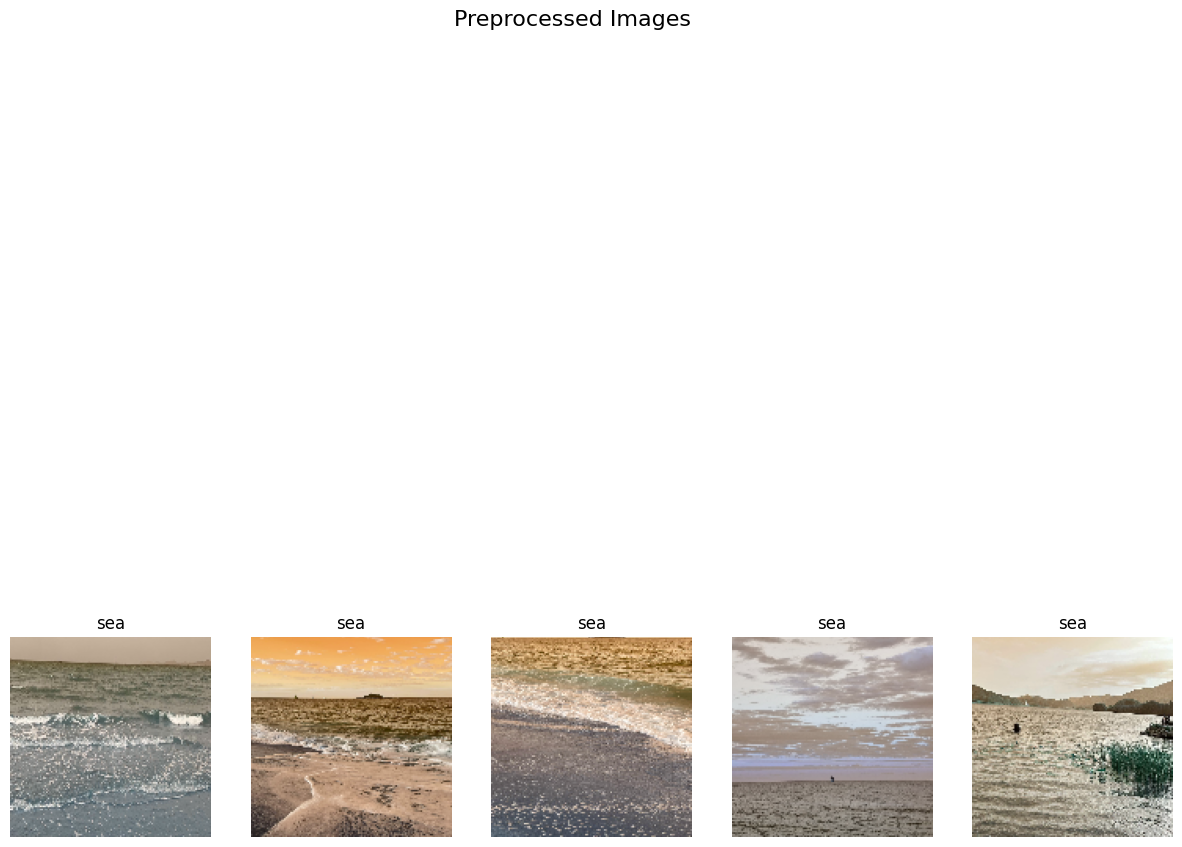

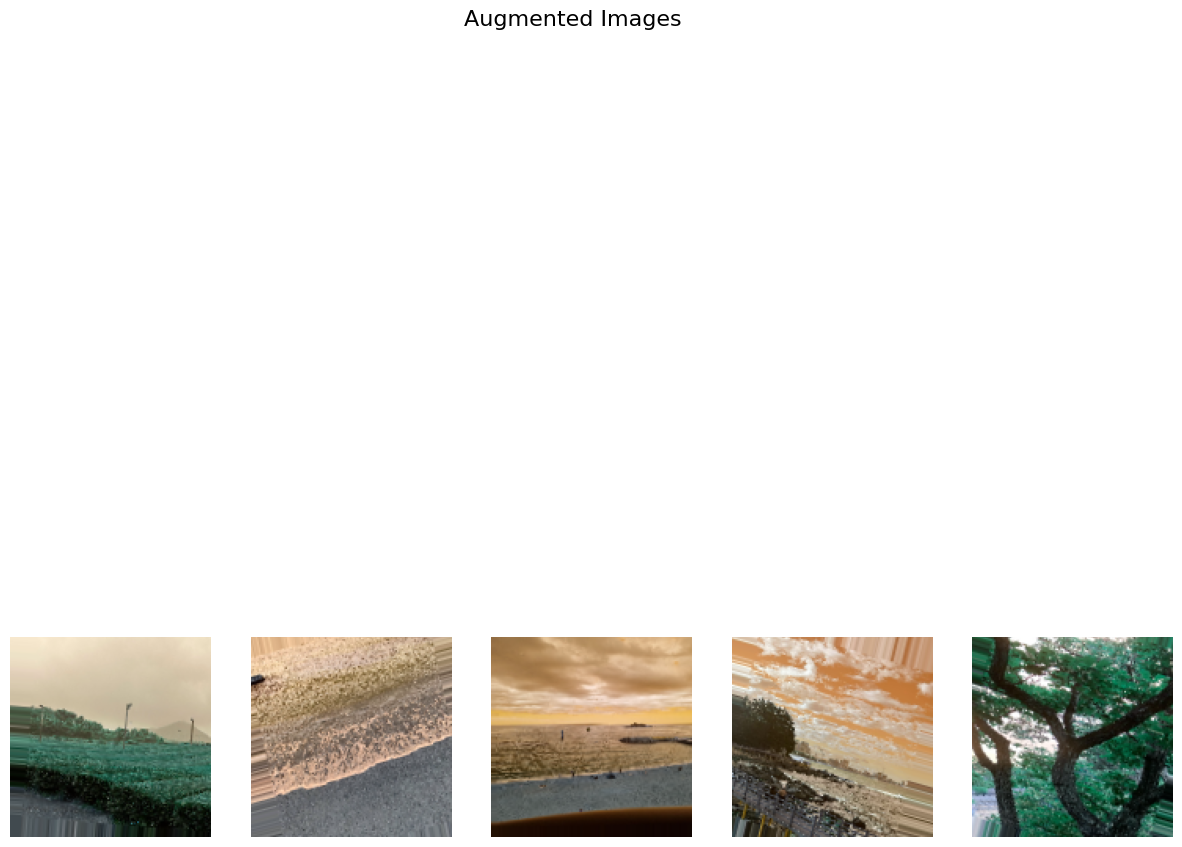

Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: 1.4046 - accuracy: 0.6552 - val_loss: 0.0806 - val_accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.2660 - accuracy: 0.9009 - val_loss: 0.0755 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 0.1222 - accuracy: 0.9698 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 7s 976ms/step - loss: 0.0822 - accuracy: 0.9741 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 7s 926ms/step - loss: 0.0462 - accuracy: 0.9784 - val_loss: 0.0367 - val_accuracy: 0.9828
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.0575 - accuracy: 0.9741 - val_loss: 0.2103 - val_accuracy: 0.9310
Epoch 7/50
7/7 [==============================] - 7s 918ms/step - loss: 0.0859 - accuracy: 0.9741 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 8/50
7/7 [==============================] - 9s 1s/step - loss: 0.1417 - accuracy: 0.9569 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 9/50
7/7 [================

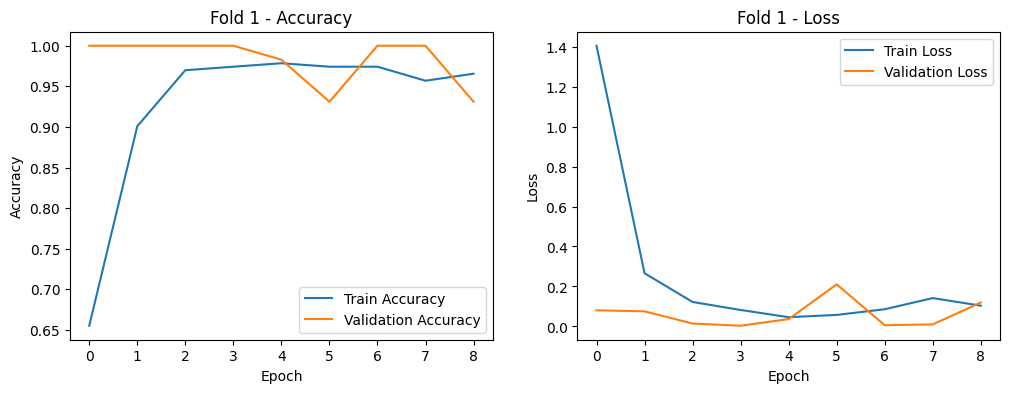

Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: 1.2977 - accuracy: 0.7026 - val_loss: 0.8831 - val_accuracy: 0.6379
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.2136 - accuracy: 0.9224 - val_loss: 0.1110 - val_accuracy: 0.9655
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.0647 - accuracy: 0.9784 - val_loss: 0.0576 - val_accuracy: 0.9655
Epoch 4/50
7/7 [==============================] - 7s 903ms/step - loss: 0.1115 - accuracy: 0.9569 - val_loss: 0.0640 - val_accuracy: 0.9828
Epoch 5/50
7/7 [==============================] - 7s 901ms/step - loss: 0.1435 - accuracy: 0.9612 - val_loss: 0.2142 - val_accuracy: 0.9138
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 0.0417 - accuracy: 0.9828 - val_loss: 0.0890 - val_accuracy: 0.9828
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.1280 - val_accuracy: 0.9655
Epoch 8/50
7/7 [===================

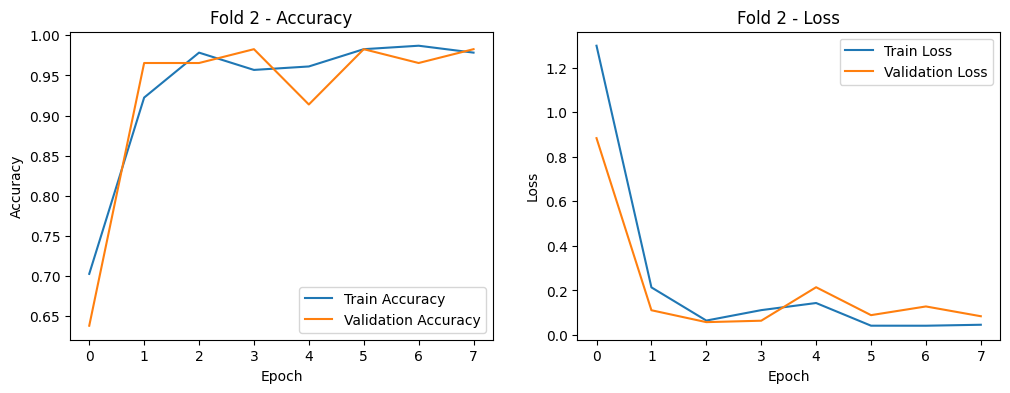

Epoch 1/50
7/7 [==============================] - 10s 1s/step - loss: 0.4719 - accuracy: 0.7974 - val_loss: 0.1355 - val_accuracy: 0.9483
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.0584 - accuracy: 0.9741 - val_loss: 0.2516 - val_accuracy: 0.9310
Epoch 3/50
7/7 [==============================] - 7s 931ms/step - loss: 0.2375 - accuracy: 0.9440 - val_loss: 0.1157 - val_accuracy: 0.9310
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.1469 - accuracy: 0.9397 - val_loss: 0.0967 - val_accuracy: 0.9655
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 0.1036 - accuracy: 0.9784 - val_loss: 0.0711 - val_accuracy: 0.9483
Epoch 6/50
7/7 [==============================] - 7s 939ms/step - loss: 0.1008 - accuracy: 0.9612 - val_loss: 0.0785 - val_accuracy: 0.9655
Epoch 7/50
7/7 [==============================] - 8s 978ms/step - loss: 0.0910 - accuracy: 0.9569 - val_loss: 0.2629 - val_accuracy: 0.8966
Epoch 8/50
7/7 [===============

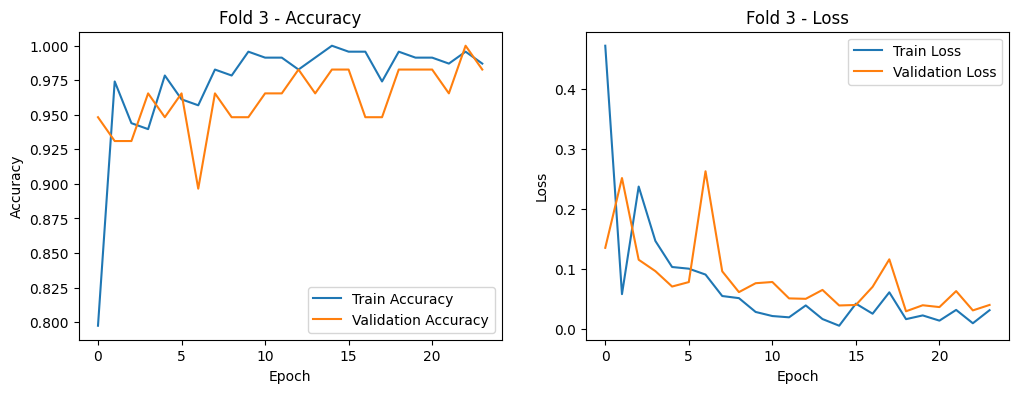

Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: 1.3814 - accuracy: 0.6422 - val_loss: 0.9574 - val_accuracy: 0.6379
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.2536 - accuracy: 0.8836 - val_loss: 0.1567 - val_accuracy: 0.9483
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.0947 - accuracy: 0.9612 - val_loss: 0.0634 - val_accuracy: 0.9655
Epoch 4/50
7/7 [==============================] - 7s 984ms/step - loss: 0.1056 - accuracy: 0.9698 - val_loss: 0.0739 - val_accuracy: 0.9655
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 0.0241 - accuracy: 0.9957 - val_loss: 0.0488 - val_accuracy: 0.9828
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.0948 - accuracy: 0.9828 - val_loss: 0.0724 - val_accuracy: 0.9828
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 0.0444 - accuracy: 0.9828 - val_loss: 0.0550 - val_accuracy: 0.9828
Epoch 8/50
7/7 [======================

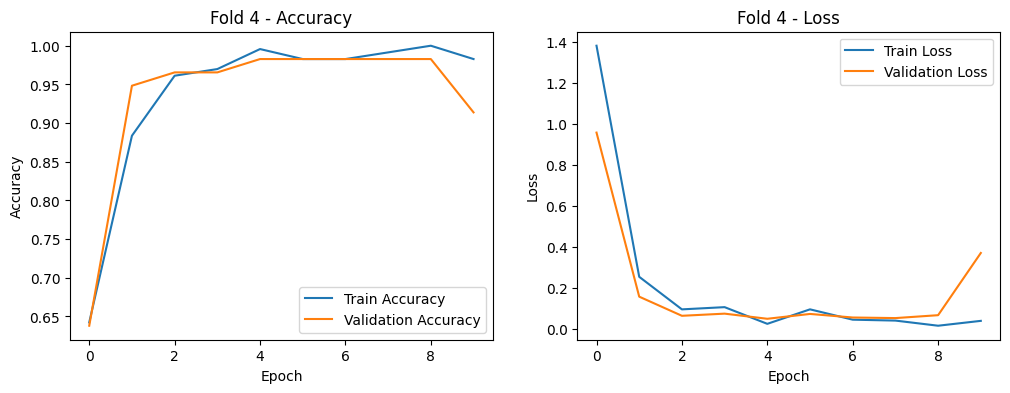

Epoch 1/50
7/7 [==============================] - 11s 1s/step - loss: 2.5047 - accuracy: 0.5431 - val_loss: 0.1190 - val_accuracy: 0.9828
Epoch 2/50
7/7 [==============================] - 7s 945ms/step - loss: 0.2544 - accuracy: 0.8922 - val_loss: 0.1717 - val_accuracy: 0.9828
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.2636 - accuracy: 0.9267 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 7s 957ms/step - loss: 0.1256 - accuracy: 0.9569 - val_loss: 0.0382 - val_accuracy: 0.9828
Epoch 5/50
7/7 [==============================] - 12s 2s/step - loss: 0.0795 - accuracy: 0.9741 - val_loss: 0.0641 - val_accuracy: 0.9828
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.1290 - accuracy: 0.9655 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 9s 1s/step - loss: 0.1348 - accuracy: 0.9397 - val_loss: 0.1004 - val_accuracy: 0.9828
Epoch 8/50
7/7 [=================

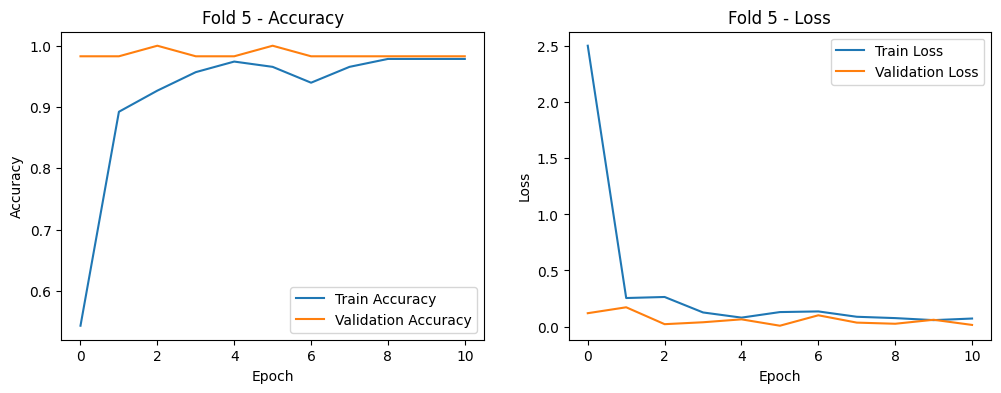

------------------------------------------------------------------------
Score per fold
> Fold 1 - Loss: 0.003391633275896311 - Accuracy: 100.0%
> Fold 2 - Loss: 0.05764741078019142 - Accuracy: 96.55172228813171%
> Fold 3 - Loss: 0.029881644994020462 - Accuracy: 98.2758641242981%
> Fold 4 - Loss: 0.048829443752765656 - Accuracy: 98.2758641242981%
> Fold 5 - Loss: 0.007293219678103924 - Accuracy: 100.0%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 98.62069010734558 (+- 1.2902270586265507)
> Loss: 0.029408670496195555
------------------------------------------------------------------------
테스트 이미지 파일 목록:
./dprproject/data/test/testimage1.jpg
./dprproject/data/test/testimage2.jpg
./dprproject/data/test/testimage3.jpg
1/1 [==============================] - 0s 104ms/step
이미지 1: 해당 이미지는 숲입니다.
1/1 [==============================] - 0s 34ms/step
이미지 2: 해당 이미지는 숲입니다.
1/1 [==============================] - 0s 41ms/step
이미지 3: 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History
from PIL import Image

# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git
data_dir = './dprproject/data/'
test_dir = './dprproject/data/test/'

# 데이터 전처리 함수
def load_data(data_dir):
    categories = ['sea', 'forest']
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (128, 128))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)

# 데이터 전처리
def preprocess_data(data, labels):
    # 레이블을 원-핫 인코딩으로 변환
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    labels = to_categorical(labels)

    # 이미지 데이터 정규화
    data = data / 255.0
    return data, labels

# 데이터 불러오기
images, labels = load_data(data_dir)

# 데이터 전처리
images, labels = preprocess_data(images, labels)

# 전처리된 이미지 시각화
def visualize_preprocessed_data(images, labels, num_samples=5):
    categories = ['sea', 'forest']
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    fig.suptitle('Preprocessed Images', fontsize=16)
    for i in range(num_samples):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(categories[np.argmax(labels[i])])
    plt.show()

# 전처리된 이미지 시각화
visualize_preprocessed_data(images, labels)

# 데이터 증강을 위한 ImageDataGenerator 생성
datagen = ImageDataGenerator(
    rotation_range=20,  # 랜덤하게 이미지를 최대 20도 회전
    width_shift_range=0.1,  # 랜덤하게 이미지를 가로로 최대 10% 이동
    height_shift_range=0.1,  # 랜덤하게 이미지를 세로로 최대 10% 이동
    horizontal_flip=True,  # 랜덤하게 이미지를 수평으로 뒤집기
    zoom_range=0.1  # 랜덤하게 이미지를 최대 10% 확대/축소
)

# 데이터 증강 샘플 시각화
def visualize_augmented_data(images, datagen, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    fig.suptitle('Augmented Images', fontsize=16)
    for x_batch in datagen.flow(images, batch_size=num_samples):
        for i in range(num_samples):
            axes[i].imshow(x_batch[i])
            axes[i].axis('off')
        break
    plt.show()

# 데이터 증강 샘플 시각화
visualize_augmented_data(images, datagen)

# K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc_per_fold = []
loss_per_fold = []

# CNN 모델 정의 함수
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold 교차 검증 실행
fold_no = 1
for train_index, val_index in kf.split(images):
    x_train, x_val = images[train_index], images[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # 모델 생성
    model = create_model()

    # 조기 종료 및 모델 체크포인트 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    # 데이터 증강 적용하여 모델 학습
    history = History()
    datagen.fit(x_train)
    model.fit(datagen.flow(x_train, y_train, batch_size=32),
              steps_per_epoch=len(x_train) / 32, epochs=50, validation_data=(x_val, y_val),
              callbacks=[history, early_stopping, model_checkpoint])

    # 모델 평가
    scores = model.evaluate(x_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # 학습 및 검증 정확도 그래프
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    fold_no += 1

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

# 테스트 이미지 불러오기 및 전처리
def load_test_images(test_dir):
    test_images = []
    test_image_paths = []  # 테스트 이미지 파일 경로를 저장할 리스트
    for filename in os.listdir(test_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(os.path.join(test_dir, filename))
            img = img.resize((128, 128))  # 모델의 입력 크기와 일치하도록 크기 조정
            img_array = np.array(img) / 255.0  # 이미지 데이터를 정규화
            test_images.append(img_array)
            test_image_paths.append(os.path.join(test_dir, filename))  # 파일 경로 저장
    return np.array(test_images), test_image_paths

test_images, test_image_paths = load_test_images(test_dir)

# 테스트 이미지 파일 목록 출력
print("테스트 이미지 파일 목록:")
for path in test_image_paths:
    print(path)

# 예측 수행 및 결과 출력
for i, img_array in enumerate(test_images):
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    prediction = model.predict(img_array)
    if prediction[0][0] > prediction[0][1]:
        print(f"이미지 {i+1}: 해당 이미지는 바다입니다.")
    else:
        print(f"이미지 {i+1}: 해당 이미지는 숲입니다.")
